# Pyspark Tutorial: Getting Started with Pyspark

Discover what Pyspark is and how it can be used while giving examples.

## An Introduction to Apache Spark

[Apache Spark](https://spark.apache.org) is a distributed processing system used to perform big data and machine learning tasks on large datasets.

As a data science enthusiast, you are probably familiar with storing files on your local device and processing it using languages like R and Python. However, local workstations have their limitations and cannot handle extremely large datasets. 

This is where a distributed processing system like Apache Spark comes in. Distributed processing is a setup in which multiple processors are used to run an application. Instead of trying to process large datasets on a single computer, the task can be divided between multiple devices that communicate with each other.

With Apache Spark, users can run queries and machine learning workflows on petabytes of data, which is impossible to do on your local device.

This framework is even faster than previous data processing engines like Hadoop, and has [increased in popularity](https://datafloq.com/read/why-apache-spark-becoming-more-popular) in the past eight years. Companies like IBM, Amazon, and Yahoo are using Apache Spark as their computational framework.

The ability to analyze data and train machine learning models on large-scale datasets is a valuable skill to have if you want to become a data scientist. Having the expertise to work with big data frameworks like Apache Spark will set you apart from others in the field.

_**Practice using Pyspark with hands-on exercises in our [Introduction to PySpark course](https://www.datacamp.com/courses/introduction-to-pyspark).**_

## What is PySpark?

PySpark is an interface for Apache Spark in Python. With PySpark, you can write Python and SQL-like commands to manipulate and analyze data in a distributed processing environment. To learn the basics of the language, you can take Datacamp’s [Introduction to PySpark](https://www.datacamp.com/courses/introduction-to-pyspark) course. This is a beginner program that will take you through manipulating data, building machine learning pipelines, and tuning models with PySpark.

## What is PySpark used for?

Most data scientists and analysts are familiar with Python and use it to implement machine learning workflows. PySpark allows them to work with a familiar language on large-scale distributed datasets.

Apache Spark can also be used with other data science programming languages like R. If this is something you are interested in learning, the[ Introduction to Spark with sparklyr in R](https://www.datacamp.com/courses/introduction-to-spark-with-sparklyr-in-r) course is a great place to start.

## Why PySpark?

Companies that collect terabytes of data will have a big data framework like Apache Spark in place. To work with these large-scale datasets, knowledge of Python and R frameworks alone will not suffice. 

You need to learn a framework that allows you to manipulate datasets on top of a distributed processing system, as most data-driven organizations will require you to do so. PySpark is a great place to get started, since its syntax is simple and can be picked up easily if you are already familiar with Python.

The reason companies choose to use a framework like PySpark is because of how quickly it can process big data. It is faster than libraries like Pandas and Dask, and can handle larger amounts of data than these frameworks. If you had over petabytes of data to process, for instance, Pandas and Dask would fail but PySpark would be able to handle it easily.

While it is also possible to write Python code on top of a distributed system like Hadoop, many organizations choose to use Spark instead and use the PySpark API since it is faster and can handle real-time data. With PySpark, you can write code to collect data from a source that is continuously updated, while data can only be processed in batch mode with Hadoop. 

Apache Flink is a distributed processing system that has a Python API called PyFlink, and is actually faster than Spark in terms of performance. However, Apache Spark has been around for a longer period of time and has better community support, which means that it is more reliable. 

Furthermore, PySpark provides fault tolerance, which means that it has the capability to recover loss after a failure occurs. The framework also has in-memory computation and is stored in random access memory (RAM). It can run on a machine that does not have a hard-drive or SSD installed.

### Dataset

We will be using Datacamp’s [e-commerce dataset](https://www.datacamp.com/workspace/datasets/dataset-r-e-commerce) for all the analysis in this tutorial, so make sure to have it downloaded. We’ve  renamed the file to “datacamp_ecommerce.csv” and saved it to the  parent directory, and you can do the same so it’s easier to code along.



## End-to-end Machine Learning PySpark Tutorial

Now that you have PySpark up and running, we will show you how to execute an end-to-end customer segmentation project using the library. 

Customer segmentation is a marketing technique companies use  to identify and group users who display similar characteristics. For instance, if you visit Starbucks only during the summer to purchase cold beverages, you can be segmented as a “seasonal shopper” and enticed with special promotions curated for  the summer season.

Data scientists usually build unsupervised machine learning algorithms such as K-Means clustering or hierarchical clustering to perform customer segmentation. These models are great at identifying similar patterns between user groups that often go unnoticed by the human eye.

In this tutorial, we will use K-Means clustering to perform customer segmentation on the e-commerce dataset we downloaded earlier.

By the end of this tutorial, you will be familiar with the following concepts:

- Reading csv files with PySpark
- Exploratory Data Analysis with PySpark
- Grouping and sorting data
- Performing arithmetic operations
- Aggregating datasets
- Data Pre-Processing with PySpark
- Working with datetime values
- Type conversion
- Joining two dataframes
- The rank() function
- PySpark Machine Learning
- Creating a feature vector
- Standardizing data
- Building a K-Means clustering model
- Interpreting the model


### Step 1: Creating a SparkSession

A SparkSession is an entry point into all functionality in Spark, and is required if you want to build a dataframe in PySpark. Run the following lines of code to initialize a SparkSession:

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# spark = SparkSession.builder.appName("Datacamp Pyspark Tutorial").config("spark.memory.offHeap.enabled","true").config("spark.memory.offHeap.size","10g").getOrCreate()

spark = SparkSession.builder.appName("Datacamp Pyspark Tutorial").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/05 07:33:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Using the codes above, we built a spark session and set a name for the application. Then, the data was cached in off-heap memory to avoid storing it directly on disk, and the amount of memory was manually specified.

### Step 2: Creating the DataFrame

We can now read the dataset we just downloaded:

In [3]:
df = spark.read.csv('data/online_retail.csv',header=True,escape="\"")

Note that we defined an escape character to avoid commas in the .csv file when parsing.

Let’s take a look at the head of the dataframe using the show() function:

In [4]:
df.show(5,0)

+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |
+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/10 8:26|2.55     |17850     |United Kingdom|
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/10 8:26|2.75     |17850     |United Kingdom|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEART.     |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|
+---------+---------+-----------------------------------+--------+------

The dataframe consists of 8 variables:

- InvoiceNo: The unique identifier of each customer invoice.
- StockCode: The unique identifier of each item in stock.
- Description: The item purchased by the customer.
- Quantity: The number of each item purchased by a customer in a single invoice.
- InvoiceDate: The purchase date.
- UnitPrice: Price of one unit of each item.
- CustomerID: Unique identifier assigned to each user.
- Country: The country from where the purchase was made


### Step 3: Exploratory Data Analysis

Now that we have seen the variables present in this dataset, let’s perform some exploratory data analysis to further understand these data points:

- Let’s start by counting the number of rows in the dataframe:

In [5]:
df.count()  # Answer: 541909

541909

- How many unique customers are present in the dataframe?

In [6]:
df.select('CustomerID').distinct().count() # Answer: 4373

4373

- What country do most purchases come from?


To find the country from which most purchases are made, we need to use the groupBy() clause in PySpark:

In [7]:
df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).show()

+------------------+-------------+
|           Country|country_count|
+------------------+-------------+
|            Sweden|            8|
|         Singapore|            1|
|           Germany|           95|
|               RSA|            1|
|            France|           87|
|            Greece|            4|
|European Community|            1|
|           Belgium|           25|
|           Finland|           12|
|             Malta|            2|
|       Unspecified|            4|
|             Italy|           15|
|              EIRE|            3|
|         Lithuania|            1|
|            Norway|           10|
|             Spain|           31|
|           Denmark|            9|
|         Hong Kong|            0|
|            Israel|            4|
|           Iceland|            1|
+------------------+-------------+
only showing top 20 rows



The following table will be rendered after running the codes above:



Almost all the purchases on the platform were made from the United Kingdom, and only a handful were made from countries like Germany, Australia, and France. 

Notice that the data in the table above isn’t presented in the order of purchases. To sort this table, we can include the orderBy() clause:

In [8]:
df.groupBy('Country').agg(countDistinct('CustomerID').alias('country_count')).orderBy(desc('country_count')).show()

+---------------+-------------+
|        Country|country_count|
+---------------+-------------+
| United Kingdom|         3950|
|        Germany|           95|
|         France|           87|
|          Spain|           31|
|        Belgium|           25|
|    Switzerland|           21|
|       Portugal|           19|
|          Italy|           15|
|        Finland|           12|
|        Austria|           11|
|         Norway|           10|
|        Denmark|            9|
|Channel Islands|            9|
|      Australia|            9|
|    Netherlands|            9|
|         Sweden|            8|
|         Cyprus|            8|
|          Japan|            8|
|         Poland|            6|
|         Greece|            4|
+---------------+-------------+
only showing top 20 rows



The output displayed is now sorted in descending order:



- When was the most recent purchase made by a customer on the e-commerce platform?


To find when the latest purchase was made on the platform, we need to convert the “InvoiceDate” column into a timestamp format and use the max() function in Pyspark:

In [9]:
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")
df = df.withColumn('date',to_timestamp("InvoiceDate", 'yy/MM/dd HH:mm'))
df.select(max("date")).show()

+-------------------+
|          max(date)|
+-------------------+
|2012-12-10 16:21:00|
+-------------------+



You should see the following table appear after running the code above:



- When was the earliest purchase made by a customer on the e-commerce platform?


Similar to what we did above, the min() function can be used to find the earliest purchase date and time:

In [10]:
df.select(min("date")).show()

+-------------------+
|          min(date)|
+-------------------+
|0001-04-11 10:00:00|
+-------------------+



Notice that the most recent and earliest purchases were made on the same day just a few hours apart. This means that the dataset we downloaded contains information of only purchases made on a single day.

### Step 4: Data Pre-processing

Now that we have analyzed the dataset and have a better understanding of each data point, we need to prepare the data to feed into the machine learning algorithm.

Let’s take a look at the head of the dataframe once again to understand how the pre-processing will be done:

In [11]:
df.show(5,0)

+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+-------------------+
|InvoiceNo|StockCode|Description                        |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |date               |
+---------+---------+-----------------------------------+--------+------------+---------+----------+--------------+-------------------+
|536365   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER |6       |12/1/10 8:26|2.55     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |71053    |WHITE METAL LANTERN                |6       |12/1/10 8:26|3.39     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |84406B   |CREAM CUPID HEARTS COAT HANGER     |8       |12/1/10 8:26|2.75     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |84029G   |KNITTED UNION FLAG HOT WATER BOTTLE|6       |12/1/10 8:26|3.39     |17850     |United Kingdom|2012-01-10 08:26:00|
|536365   |84029E   |RED WOOLLY HOTTIE WHITE HEA

From the dataset above, we need to create multiple customer segments based on each user’s purchase behavior. 

The variables in this dataset are in a format that cannot be easily ingested into the customer segmentation model. These features individually do not tell us much about customer purchase behavior.

Due to this, we will use the existing variables to derive three new informative features - recency, frequency, and monetary value (RFM).

[RFM](https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp) is commonly used in marketing to evaluate a client’s value based on their:

- Recency: How recently has each customer made a purchase?
- Frequency: How often have they bought something?
- Monetary Value: How much money do they spend on average when making purchases?


We will now preprocess the dataframe to create the above variables.

#### Recency

First, let’s calculate the value of recency - the latest date and time a purchase was made on the platform. This can be achieved in two steps:

##### i) Assign a recency score to each customer

We will subtract every date in the dataframe from the earliest date. This will tell us how recently a customer was seen in the dataframe. A value of 0 indicates the lowest recency, as it will be assigned to the person who was seen making a purchase on the earliest date.

In [12]:
df = df.withColumn("from_date", lit("12/1/10 08:26"))
df = df.withColumn('from_date',to_timestamp("from_date", 'yy/MM/dd HH:mm'))

df2=df.withColumn('from_date',to_timestamp(col('from_date'))).withColumn('recency',col("date").cast("long") - col('from_date').cast("long"))

##### ii) Select the most recent purchase

One customer can make multiple purchases at different times. We need to select only the last time they were seen buying a product, as this is indicative of when the most recent purchase was made:

In [13]:
df2 = df2.join(df2.groupBy('CustomerID').agg(max('recency').alias('recency')),on='recency',how='leftsemi')

Let’s look at the head of the new dataframe. It now has a variable called “recency” appended to it:

In [14]:
df2.show(5,0)

+-------+---------+---------+----------------------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+
|recency|InvoiceNo|StockCode|Description                       |Quantity|InvoiceDate |UnitPrice|CustomerID|Country       |date               |from_date          |
+-------+---------+---------+----------------------------------+--------+------------+---------+----------+--------------+-------------------+-------------------+
|540    |536369   |21756    |BATH BUILDING BLOCK WORD          |3       |12/1/10 8:35|5.95     |13047     |United Kingdom|2012-01-10 08:35:00|2012-01-10 08:26:00|
|2040   |536371   |22086    |PAPER CHAIN KIT 50'S CHRISTMAS    |80      |12/1/10 9:00|2.55     |13748     |United Kingdom|2012-01-10 09:00:00|2012-01-10 08:26:00|
|3960   |536375   |85123A   |WHITE HANGING HEART T-LIGHT HOLDER|6       |12/1/10 9:32|2.55     |17850     |United Kingdom|2012-01-10 09:32:00|2012-01-10 08:26:00|
|3960   |536375   |710

An easier way to view all the variables present in a PySpark dataframe is to use its printSchema() function. This is the equivalent of the info() function in Pandas:

In [15]:
df2.printSchema()

root
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)



The output rendered should look like this:



#### Frequency

Let’s now calculate the value of frequency - how often a customer bought something on the platform. To do this, we just need to group by each customer ID and count the number of items they purchased:

In [16]:
df_freq = df2.groupBy('CustomerID').agg(count('InvoiceDate').alias('frequency'))

Look at the head of this new dataframe we just created:

In [17]:
df_freq.show(5,0)

+----------+---------+
|CustomerID|frequency|
+----------+---------+
|16250     |14       |
|15574     |121      |
|15271     |24       |
|15555     |37       |
|16320     |47       |
+----------+---------+
only showing top 5 rows



There is a frequency value appended to each customer in the dataframe. This new dataframe only has two columns, and we need to join it with the previous one:

In [18]:
df3 = df2.join(df_freq,on='CustomerID',how='inner')

Let’s print the schema of this dataframe:

In [19]:
df3.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- recency: long (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: string (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- from_date: timestamp (nullable = true)
 |-- frequency: long (nullable = false)



#### 

#### Monetary Value

Finally, let’s calculate monetary value - the total amount spent by each customer in the dataframe. There are two steps to achieving this:

##### i) Find the total amount spent in each purchase:

Each customerID comes with variables called “Quantity” and “UnitPrice” for a single purchase:



To get the total amount spent by each customer in one purchase, we need to multiply “Quantity” with “UnitPrice”:

In [20]:
m_val = df3.withColumn('TotalAmount',col("Quantity") * col("UnitPrice"))

##### ii) Find the total amount spent by each customer:

To find the total amount spent by each customer overall, we just need to group by the CustomerID column and sum the total amount spent:

In [21]:
m_val = m_val.groupBy('CustomerID').agg(sum('TotalAmount').alias('monetary_value'))

Merge this dataframe with the all the other variables:

In [22]:
finaldf = m_val.join(df3,on='CustomerID',how='inner')

Now that we have created all the necessary variables to build the model, run the following lines of code to select only the required columns and drop duplicate rows from the dataframe:

In [23]:
finaldf = finaldf.select(['recency','frequency','monetary_value','CustomerID']).distinct()

Look at the head of the final dataframe to ensure that the pre-processing has been done accurately:



#### Standardization

Before building the customer segmentation model, let’s standardize the dataframe to ensure that all the variables are around the same scale:

In [24]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

assemble=VectorAssembler(inputCols=[
    'recency','frequency','monetary_value'
], outputCol='features')

assembled_data=assemble.transform(finaldf)

scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)

Run the following lines of code to see what the standardized feature vector looks like:

In [25]:
data_scale_output.select('standardized').show(2,truncate=False)

+--------------------------------------------------------------+
|standardized                                                  |
+--------------------------------------------------------------+
|[1.8278066366100807E-7,0.4589020319425584,0.07645669520731263]|
|[8.859948728858327E-5,3.966224704646398,0.12700520719300873]  |
+--------------------------------------------------------------+
only showing top 2 rows



These are the scaled features that will be fed into the clustering algorithm.

If you’d like to learn more about data preparation with PySpark, take this [feature engineering course](https://www.datacamp.com/courses/feature-engineering-with-pyspark) on Datacamp.

### Step 5: Building the Machine Learning Model

Now that we have completed all the data analysis and preparation, let’s build the K-Means clustering model. 

The algorithm will be created using PySpark’s [machine learning API](https://spark.apache.org/docs/2.3.0/api/python/pyspark.ml.html).

#### i) Finding the number of clusters to use

When building a K-Means clustering model, we first need to determine the number of clusters or groups we want the algorithm to return. If we decide on three clusters, for instance, then we will have three customer segments.

The most popular technique used to decide on how many clusters to use in K-Means is called the “elbow-method.”

This is done simply running the K-Means algorithm for a wide range of clusters and visualizing the model results for each cluster. The plot will have an inflection point that looks like an elbow, and we just pick the number of clusters at this point.

Read this Datacamp [K-Means clustering tutorial](https://www.datacamp.com/tutorial/k-means-clustering-python) to learn more about how the algorithm works.

Let’s run the following lines of code to build a K-Means clustering algorithm from 2 to 6 clusters:

In [26]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

max_k = 6

cost = np.zeros(max_k)

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized',metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2, max_k):
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    output=KMeans_fit.transform(data_scale_output)
    cost[i] = KMeans_fit.summary.trainingCost

25/02/05 07:34:30 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


With the codes above, we have successfully built and evaluated a K-Means clustering model with 2 to 6 clusters. The results have been placed in an array, and can now be visualized in a line chart:

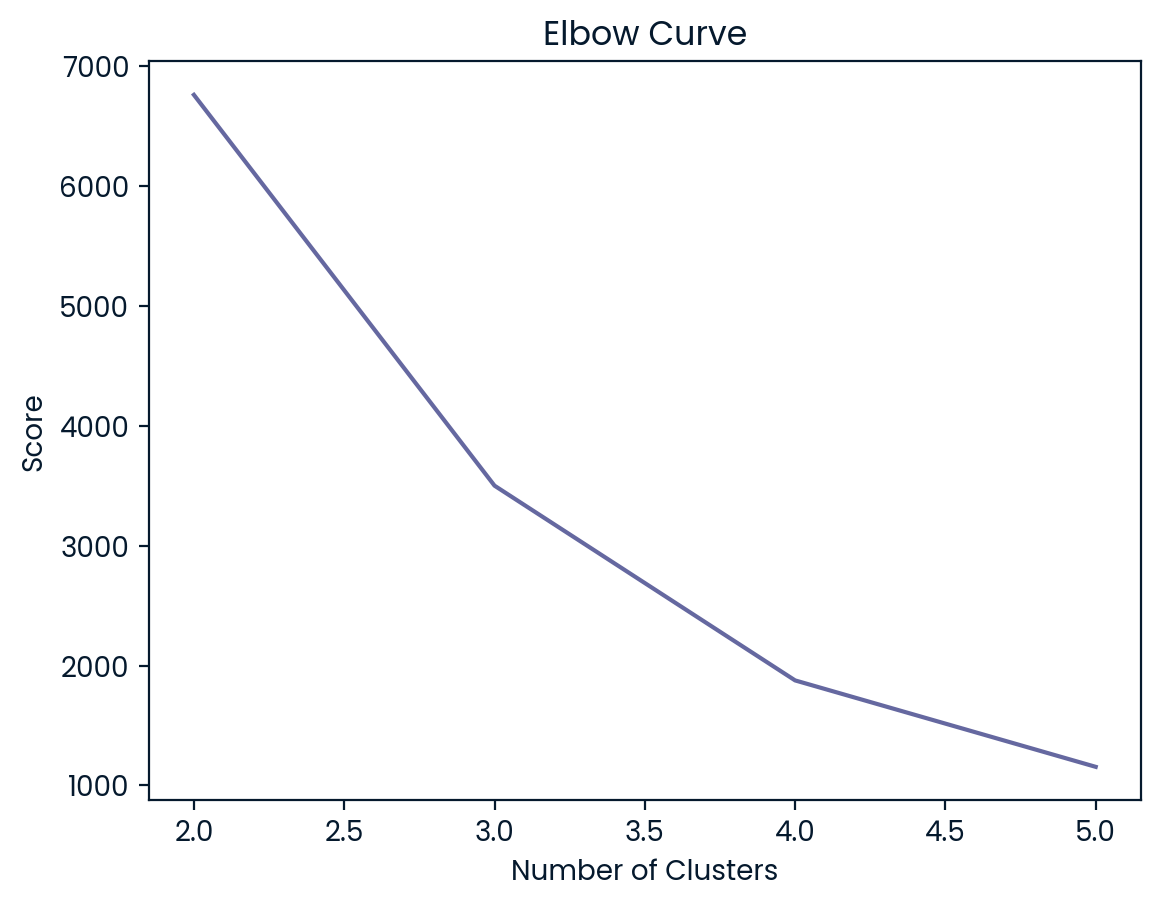

In [27]:
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = range(2, max_k)
df_cost.insert(0, 'cluster', new_col)
plt.plot(df_cost.cluster, df_cost.cost)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

The codes above will render the following chart:



#### ii) Building the K-Means Clustering Model

From the plot above, we can see that there is an inflection point that looks like an elbow at four. Due to this, we will proceed to build the K-Means algorithm with four clusters:

In [28]:
KMeans_algo=KMeans(featuresCol='standardized', k=4)
KMeans_fit=KMeans_algo.fit(data_scale_output)

#### iii) Making Predictions

Let’s use the model we created to assign clusters to each customer in the dataset:

In [29]:
preds=KMeans_fit.transform(data_scale_output)

preds.show(5,0)

+------------+---------+-----------------+----------+---------------------------------------+--------------------------------------------------------------+----------+
|recency     |frequency|monetary_value   |CustomerID|features                               |standardized                                                  |prediction|
+------------+---------+-----------------+----------+---------------------------------------+--------------------------------------------------------------+----------+
|5580        |14       |226.14           |16250     |[5580.0,14.0,226.14]                   |[1.8278066366100807E-7,0.4589020319425584,0.07645669520731263]|0         |
|2704800     |121      |375.65           |15574     |[2704800.0,121.0,375.65]               |[8.859948728858327E-5,3.966224704646398,0.12700520719300873]  |3         |
|21100860    |24       |111.75           |15271     |[2.110086E7,24.0,111.75]               |[6.911880277093224E-4,0.7866891976158145,0.03778206283460329] |0   

Notice that there is a “prediction” column in this dataframe that tells us which cluster each CustomerID belongs to:



### Step 6: Cluster Analysis

The final step in this entire tutorial is to analyze the customer segments we just built.

Run the following lines of code to visualize the recency, frequency, and monetary value of each customerID in the dataframe:

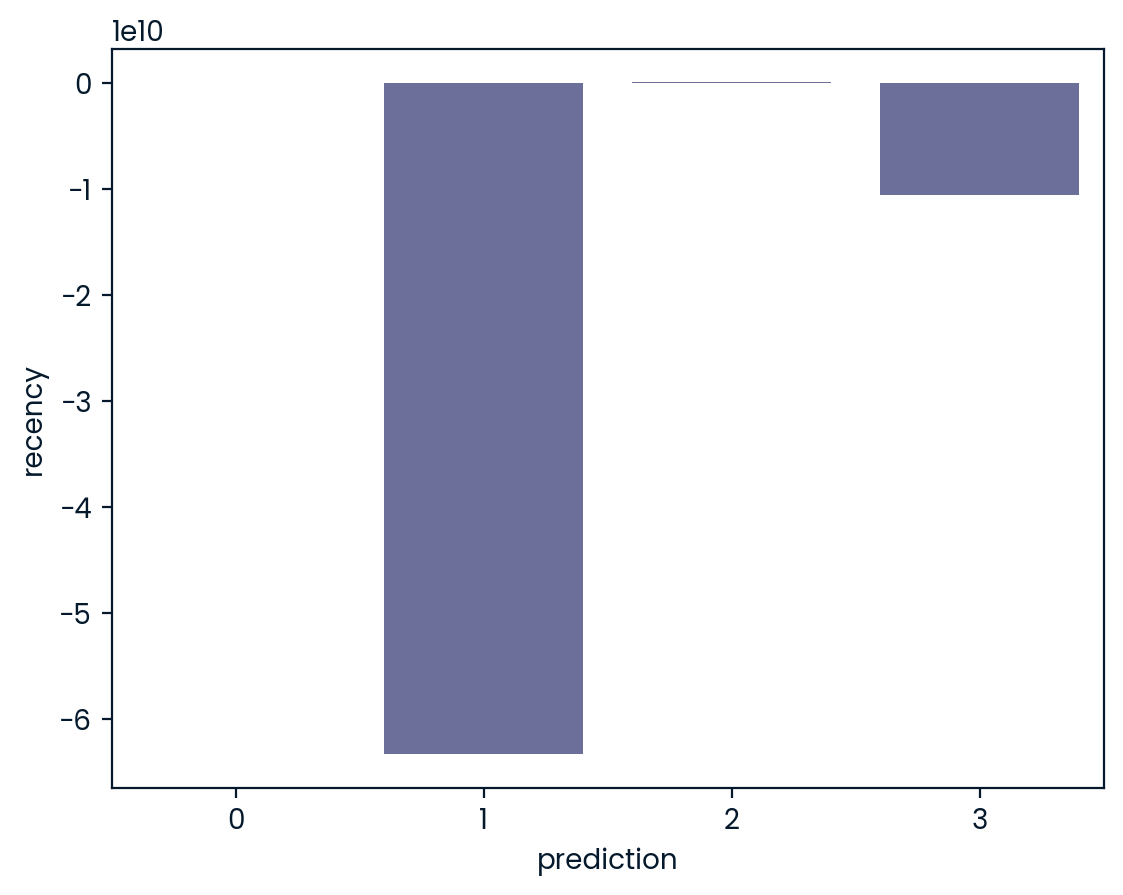

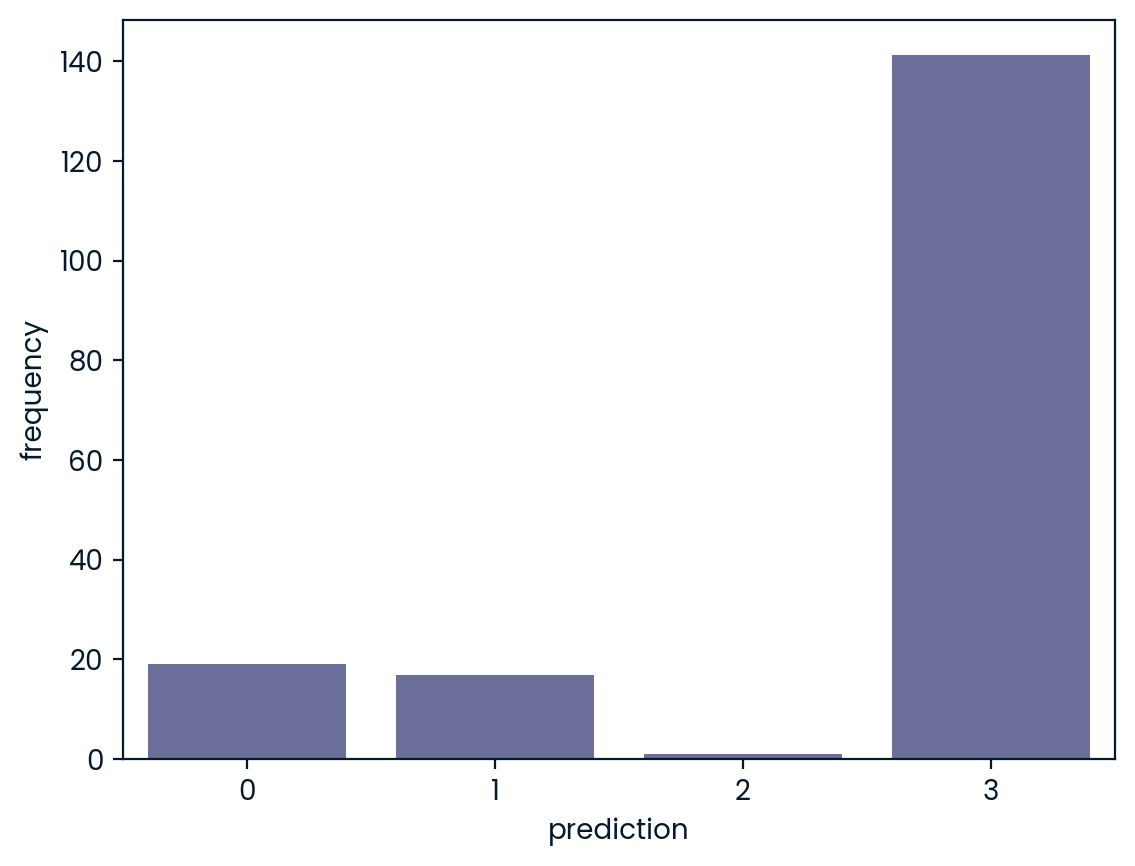

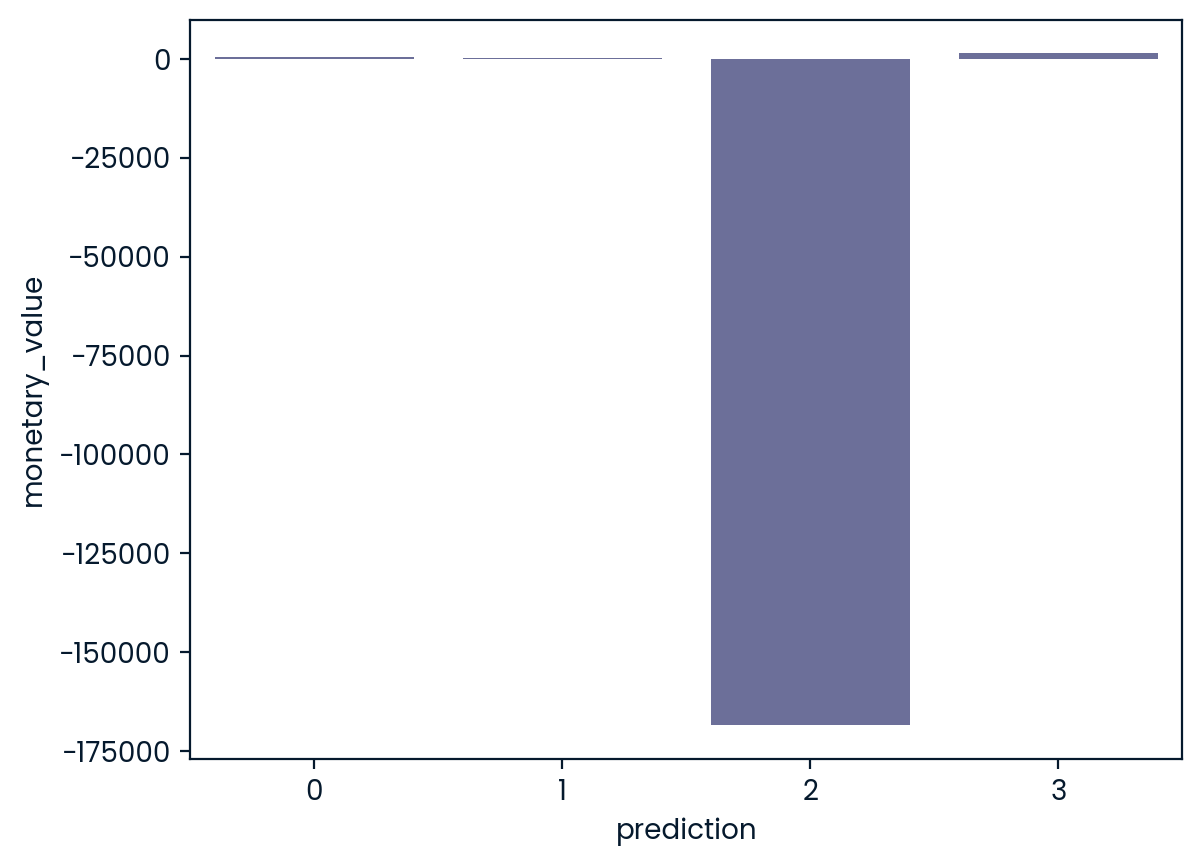

In [30]:
df_viz = preds.select('recency','frequency','monetary_value','prediction')
df_viz = df_viz.toPandas()
avg_df = df_viz.groupby(['prediction'], as_index=False).mean()

list1 = ['recency','frequency','monetary_value']

for i in list1:
    sns.barplot(x='prediction',y=str(i),data=avg_df)
    plt.show()

The codes above will render the following plots:







Here is an overview of characteristics displayed by customers in each cluster:

- Cluster 0: Customers in this segment display low recency, frequency, and monetary value. They rarely shop on the platform and are low potential customers who are likely to stop doing business with the ecommerce company.


 

- Cluster 1: Users in this cluster display high recency but haven’t been seen spending much on the platform. They also don’t visit the site often. This indicates that they might be newer customers who have just started doing business with the company.


 

- Cluster 2: Customers in this segment display medium recency and frequency and spend a lot of money on the platform. This indicates that they tend to buy high-value items or make bulk purchases.


 

- Cluster 3: The final segment comprises users who display high recency and make frequent purchases on the platform. However, they don’t spend much on the platform, which might mean that they tend to select cheaper items in each purchase.


To go beyond the predictive modelingmodelling concepts covered in this course, you can take the [Machine Learning with PySpark](https://www.datacamp.com/courses/machine-learning-with-pyspark) course on Datacamp.

## Learning PySpark From Scratch - Next Steps:

If you managed to follow along with this entire PySpark tutorial, congratulations! You have now successfully installed PySpark onto your local device, analyzed an e-commerce dataset, and built a machine learning algorithm using the framework.

One caveat of the analysis above is that it was conducted with 2,500 rows of ecommerce data collected on a single day. The outcome of this analysis can be solidified if we had a larger amount of data to work with, as techniques like RFM modeling are usually applied onto months of historical data.

However, you can take the principles learned  in this article and apply them to a wide variety of larger datasets in the unsupervised machine learning space.

Check out this [cheat sheet](https://www.datacamp.com/cheat-sheet/pyspark-cheat-sheet-spark-in-python) by Datacamp to learn more about PySpark’s syntax and its modules.

Finally, if you’d like to go beyond the concepts covered in this tutorial and learn the fundamentals of programming with PySpark, you can take the [Big Data with PySpark](https://www.datacamp.com/tracks/big-data-with-pyspark) learning track on Datacamp. This track contains a series of courses that will teach you to do the following with PySpark:

- Data Management, Analysis, and Pre-processing
- Building and Tuning Machine Learning Pipelines
- Big Data Analysis 
- Feature Engineering 
- Building Recommendation Engines